In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

sns.set_context('notebook', font_scale=1.5)

**1**. Exact geometric solutions with $n = m$

- Find the equation of the line that passes through the points (2,1) and (3,7)
- Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

Hint: The equation of a circle can be written as

$$
(x - a)^2 + (y - b)^2 = r^2
$$

In [2]:
x = np.array([2,3])
y = np.array([1,7])
A = np.c_[np.ones(2), x]

Find the equation of the line that passes through the points (2,1) and (3,7)

We write the following equation using matrix notation

$a_0 + a_1 x = y$

In [3]:
A

array([[1., 2.],
       [1., 3.]])

In [4]:
la.solve(A, y)

array([-11.,   6.])

Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

We expand the circle equation to get

$$
x^2 - 2ax + a^2 + y^2 - 2by + b^2 = r^2
$$

and rearrange terms

$$
2ax + 2by + (r^2 - a^2 -v^2) = x^2 + y^2
$$

which we can solve as a matrix equation.

In [5]:
x = np.array([1, 6, 4])
y = np.array([7, 2, 6])
A = np.c_[2*x, 2*y, np.ones(3)]

In [6]:
A

array([[ 2., 14.,  1.],
       [12.,  4.,  1.],
       [ 8., 12.,  1.]])

In [7]:
la.solve(A, x**2 + y**2)

array([ 1.,  2., 20.])

**2**. Interpolating polynomials and choice of basis

We have 

| $x_i$ | $y_i$ |
| ----- | -------- |
| 0     | -5       |
| 1     | -3       |
| -1     | -15       |
| 2     | 39       |
| -2     | -9       |

Find interpolating polynomials using

- Monomial basis $f_i(x_i) = x^i$ - code this using only simple linear algebra operations (including solve)
- Lagrange basis
$$
l_j(x_j) = \prod_{0 \le m \le k, m \ne j} \frac{x - x_m}{x_j - x_m}
$$

The Lagrange interpolation uses the values of $y$ as the coefficient for the basis polynomials. Do this manually and then using the scipy.interpolate package

In [8]:
x = np.array([0,1,-1,2,-2])
y = np.array([-5, -3, -15, 39, -9])

Monomial basis

In [9]:
A = np.c_[np.ones(5), x, x**2, x**3, x**4]

In [10]:
A

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.,  1.],
       [ 1.,  2.,  4.,  8., 16.],
       [ 1., -2.,  4., -8., 16.]])

In [11]:
c = la.solve(A, y)

In [12]:
c

array([-5.,  4., -7.,  2.,  3.])

In [13]:
xp = np.linspace(-2, 2, 100)
yp = np.c_[np.ones(100), xp, xp**2, xp**3, xp**4] @ c

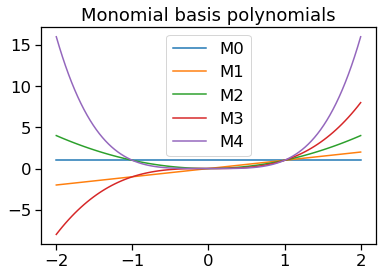

In [14]:
plt.plot(xp, xp**0, label='M0')
plt.plot(xp, xp, label='M1')
plt.plot(xp, xp**2, label='M2')
plt.plot(xp, xp**3, label='M3')
plt.plot(xp, xp**4, label='M4')
plt.legend()
plt.title('Monomial basis polynomials')
pass

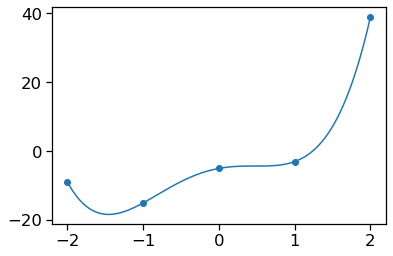

In [15]:
plt.scatter(x, y)
plt.plot(xp, yp)
pass

Lagrange basis

In [16]:
xp = np.linspace(-2, 2, 50)
L0 = ((xp-x[1])*(xp-x[2])*(xp-x[3])*(xp-x[4])) / ((x[0]-x[1])*(x[0]-x[2])*(x[0]-x[3])*(x[0]-x[4]))
L1 = ((xp-x[0])*(xp-x[2])*(xp-x[3])*(xp-x[4])) / ((x[1]-x[0])*(x[1]-x[2])*(x[1]-x[3])*(x[1]-x[4]))
L2 = ((xp-x[0])*(xp-x[1])*(xp-x[3])*(xp-x[4])) / ((x[2]-x[0])*(x[2]-x[1])*(x[2]-x[3])*(x[2]-x[4]))
L3 = ((xp-x[0])*(xp-x[1])*(xp-x[2])*(xp-x[4])) / ((x[3]-x[0])*(x[3]-x[1])*(x[3]-x[2])*(x[3]-x[4]))
L4 = ((xp-x[0])*(xp-x[1])*(xp-x[2])*(xp-x[3])) / ((x[4]-x[0])*(x[4]-x[1])*(x[4]-x[2])*(x[4]-x[3]))

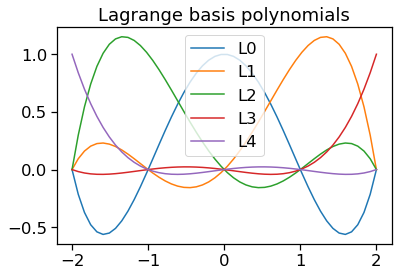

In [17]:
plt.plot(xp, L0, label='L0')
plt.plot(xp, L1, label='L1')
plt.plot(xp, L2, label='L2')
plt.plot(xp, L3, label='L3')
plt.plot(xp, L4, label='L4')
plt.legend()
plt.title('Lagrange basis polynomials')
pass

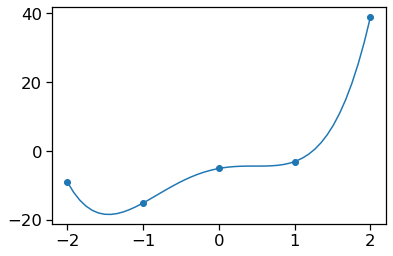

In [18]:
plt.scatter(x, y)
plt.plot(xp, y[0]*L0 + y[1]*L1 + y[2]*L2 + y[3]*L3 + y[4]*L4)
pass

Using library functions

In [19]:
from scipy.interpolate import lagrange

In [20]:
lp = lagrange(x, y)

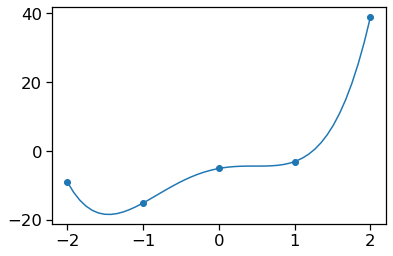

In [21]:
plt.scatter(x, y)
plt.plot(xp, lp(xp))
pass

**3**. Markov chains

$$
P = \pmatrix{
    p_{11} & p_{12} & p_{13} \\
    p_{21} & p_{22} & p_{33} \\
    p_{31} & p_{32} & p_{33} \\
    }
$$

By convention, the $rows$ of a Markov transition matrix sum to 1, and $p_{32}$ is the probability that the system will change from state 3 to state 2. Therefore, to see the next state of an initial probability row vector $v_k$, we need to perform left multiplication

$$
v_{k+1}^T = v_{k}^T P
$$

If this is confusing, you can work with the matrix $P^T$ and do right-multiplication with column vectors. In this case, $p_{32}$ is the probability that the system will change from state 2 to state 3.

![img](../data/markov.png)

Find the stationary vector $\pi^T = \pi^T P$ for the transition graph shown 

- by solving a set of linear equations
- by solving an eigenvector problem
- Check that the resulting vector is invariant with respect to the transition matrix

```dot
%%file markov.dot

digraph g {
a -> a [label=0.8]
b -> b [label=0.2]
c -> c [label=0.2]
a -> b [label=0.1]
b -> a [label=0.3]
a -> c [label=0.1]
c -> a [label=0.2]
b -> c [label=0.5]
c -> b [label=0.6]
}
```

In [22]:
P = np.array([
    [0.8, 0.1, 0.1],
    [0.3, 0.2, 0.5],
    [0.2, 0.6, 0.2]    
])

In [23]:
lam, v = la.eig(P)

In [24]:
pi = v[:, np.argmax(lam)]
pi = pi/pi.sum()
pi

array([0.33333333, 0.33333333, 0.33333333])

In [25]:
A = np.eye(3) - P

In [26]:
A

array([[ 0.2, -0.1, -0.1],
       [-0.3,  0.8, -0.5],
       [-0.2, -0.6,  0.8]])

In [27]:
A[-1, :] = np.ones(3)
pi = la.solve(A, np.array([0,0,1]))

In [28]:
pi

array([0.33333333, 0.33333333, 0.33333333])

Brute force check

In [29]:
x0 = np.random.rand(3)
x0 /= x0.sum()
np.linalg.matrix_power(P, 100) @ x0.reshape(-1,1)

array([[0.33918325],
       [0.33918325],
       [0.33918325]])

**4**. Graphs

$M$ is the adjacency matrix of a directed graph $G$. Find the vertices that belong to a clique.

$$
M = \pmatrix{
    0 & 1 & 0 & 1 & 1 \\
    1 & 0 & 0 & 1 & 0 \\
    1 & 1 & 0 & 1 & 0 \\
    1 & 1 & 0 & 0 & 0 \\
    1 & 0 & 0 & 1 & 0
    }
$$

A clique is defined as a subset of a graph where

1. The subset has at least 3 vertices
2. All pairs of vertices are connected
3. The subset is as large as possible

Because of the symmetry required in condition 2, we only need to consider the graph $S$ where $s_{ij} = 1$ if vertcies $i$ and $j$ communicate and 0 otherwise. Then the on-zero diagonal entries of $S^3$ is the set states recurrent in 3 steps. That is, there is a bi-directional path ${s_i \leftrightarrow s_j \leftrightarrow s_k \leftrightarrow s_i}$, which means that the vertices $\{s_i, s_j, s_k\}$ form a subset of a clique.

In [30]:
M = np.array([
    [0,1,0,1,1],
    [1,0,0,1,1],
    [1,1,0,1,0],
    [1,1,0,0,0],
    [1,0,0,1,0]   
])

In [31]:
S = np.where((M == 1) & (M == M.T), 1, 0)

In [32]:
S

array([[0, 1, 0, 1, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [33]:
S3 = np.linalg.matrix_power(S, 3)
S3

array([[2, 4, 0, 4, 3],
       [4, 2, 0, 3, 1],
       [0, 0, 0, 0, 0],
       [4, 3, 0, 2, 1],
       [3, 1, 0, 1, 0]])

Therefore nodes 0, 1, and 3 are part of a clique, and since the smallest clique has 3 members, they are from the same clique.

**5**. Suppose we wish to solve the problem $t = Mt + b$ - here the notation is from one type of such problems where $t$ is the temperature, $M$ is a matrix for diffusion, and $b$ represent fixed boundary conditions. Suppose we have a 5 by 5 grid system whose boundary temperatures are fixed. Let $M$ is a matrix with $1/4$ for the $\pm 1$ off-diagonals and 0 elsewhere (i.e. diffusion is approximated by the average temperature of the 4 N, S, E, W neighbors), and $b$ is the vector $(5,2,3,3,0,1,3,0,1)$ - this assumes the temperatures along the bottom = 0, right edge = 1, top = 2 and left edge = 3. Find the equilibrium temperature at each of the 9 interior points

- by solving a linear equation
- by iteration

averaging neighbors 

In [34]:
M = 1/4 * (np.eye(9, k=1) + np.eye(9, k=-1))

In [35]:
M

array([[0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ]])

In [37]:
b = 1/4*np.array([5,2,3,3,0,1,3,0,1,]).reshape((-1,1))
b

array([[1.25],
       [0.5 ],
       [0.75],
       [0.75],
       [0.  ],
       [0.25],
       [0.75],
       [0.  ],
       [0.25]])

Direct solution - not possible for large matrices

In [38]:
la.solve(np.eye(9) - M, b).reshape(3,3)

array([[1.55719157, 1.22876629, 1.35787359],
       [1.20272807, 0.45303867, 0.60942663],
       [0.98466785, 0.32924476, 0.33231119]])

Jacobi iteration

In [39]:
t = np.random.uniform(0,1,9).reshape((-1,1))

In [40]:
for i in range(101):
    t = M@t + b
    if i % 25 == 0:
        print(t.reshape(3,3))

[[1.27271421 0.89071399 0.89050486]
 [1.19976963 0.293407   0.7036047 ]
 [1.03827871 0.38273509 0.36266236]]
[[1.55719157 1.22876629 1.35787359]
 [1.20272806 0.45303867 0.60942663]
 [0.98466785 0.32924476 0.33231119]]
[[1.55719157 1.22876629 1.35787359]
 [1.20272807 0.45303867 0.60942663]
 [0.98466785 0.32924476 0.33231119]]
[[1.55719157 1.22876629 1.35787359]
 [1.20272807 0.45303867 0.60942663]
 [0.98466785 0.32924476 0.33231119]]
[[1.55719157 1.22876629 1.35787359]
 [1.20272807 0.45303867 0.60942663]
 [0.98466785 0.32924476 0.33231119]]


In [41]:
tc = np.zeros((5,5))
tc[1:-1, 1:-1] = t.reshape((3,3))
tc[-1, 1:] = 0
tc[1:,-1] = 1
tc[0, 1:] = 2
tc[:-1,0 ] = 3

In [42]:
tc

array([[3.        , 2.        , 2.        , 2.        , 2.        ],
       [3.        , 1.55719157, 1.22876629, 1.35787359, 1.        ],
       [3.        , 1.20272807, 0.45303867, 0.60942663, 1.        ],
       [3.        , 0.98466785, 0.32924476, 0.33231119, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ]])

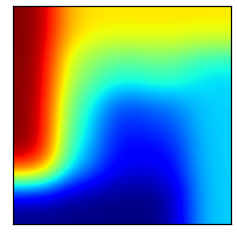

In [43]:
plt.imshow(tc, interpolation='gaussian', cmap='jet')
plt.xticks([])
plt.yticks([])
pass

**6**. Iterated affine maps

Define the following mapping in $\mathbb{R}^2$

$$
T_i: \pmatrix{x \\ y} \to s \pmatrix{\cos \theta & - \sin \theta \\ \sin \theta & \cos \theta} \pmatrix{x \\ y} + \pmatrix{a_i \\ b_i}
$$

Suppose $s = 1/3$, $\theta = 0$, and $\pmatrix{a_i \\ b_i}$ are 

$$
\pmatrix{0 \\ 0}, \pmatrix{1/3 \\ 0},
\pmatrix{2/3 \\ 0}, \pmatrix{0 \\ 1/3},
\pmatrix{2/3 \\ 1/3}, \pmatrix{0 \\ 2/3}, 
\pmatrix{1/3 \\ 2/3}, \pmatrix{2/3 \\ 2/3}
$$

Generate 1,000 points by first randomly selecting a point in the unit square, then applying at random one of th transformations $T_i$ to the point. Plot the resulting 1,000 points as a scatter plot on in a square frame.


In [44]:
def f(x, s, ab):
    """Sierpinski."""
    
    return s*np.eye(2)@x.reshape((-1,1)) + ab.reshape((-1,1))

In [45]:
ab =[
    [0,0],
    [1/3,0],
    [2/3,0],
    [0,1/3],
    [2/3,1/3],
    [0,2/3],
    [1/3,2/3],
    [2/3,2/3]
]

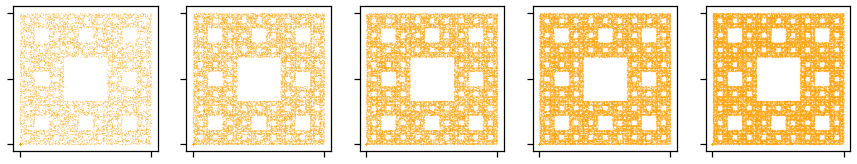

In [46]:
n = 50001
burn = 10
grid = np.zeros((n,2))
idx = np.random.choice(8, n)
tr = np.array(ab)[idx][:,:,None]
x = np.random.uniform(0,1,(2, 1))
s = 1/3
fig, axes = plt.subplots(1,5, figsize=(15,3))
for i in range(n):
    x =  np.reshape(s*np.eye(2) @ x + tr[i,:], (2,1))
    grid[i] = x.ravel()
    if i % 10000 == 0:
        ax = axes[(i-1) // 10000]
        ax.scatter(grid[burn:, 0], grid[burn:, 1], s=0.01, c='orange')
        ax.axis('square')
        ax.set_xticklabels([])
        ax.set_yticklabels([])

**7**. The Fibonacci sequence came about from this toy model of rabbit population dynamics

- A baby rabbit matures into an adult in 1 time unit
- An adult gives birth to exactly 1 baby in 1 time unit
- Rabbits are immortal

This gives the well known formula for the number of rabbits over discrete time $F_{k+2} = F_{k} + F_{k+1}$

- Express this model as a matrix equation, and calculate the long-term growth rate

Let the population at any time be expreessed as the vector
$$
\pmatrix{\text{adult} \\ \text{baby} }
$$

In the next time step, there will be 

- 1 adult from each adult, and one adult from each baby
- 1 baby from each adult

In [47]:
A = np.array([[1,1],[1,0]])

In [48]:
A

array([[1, 1],
       [1, 0]])

In [49]:
x0 = np.array([1,1]).reshape(-1,1)

In [50]:
x = x0
for i in range(10):
    x = A @ x
    print(x.ravel(), end=', ')
    print('Growth rate = %.3f' % (x[0,0]/x[1,0]))

[2 1], Growth rate = 2.000
[3 2], Growth rate = 1.500
[5 3], Growth rate = 1.667
[8 5], Growth rate = 1.600
[13  8], Growth rate = 1.625
[21 13], Growth rate = 1.615
[34 21], Growth rate = 1.619
[55 34], Growth rate = 1.618
[89 55], Growth rate = 1.618
[144  89], Growth rate = 1.618


Long term growth rate is the largest eigenvalue of the matrix.

In [51]:
la.eigvals(A).max()

(1.618033988749895+0j)

**8**. Age-structured population growth

Suppose that we observe the following Leslie matrix

$$
L = \pmatrix{
0 & 3 & 2 & 0.5 \\
0.8 & 0 & 0 & 0 \\
0 & 0.9 & 0 & 0 \\
0 & 0 & 0.7 & 0
}
$$

![img](../data/leslie.png)

- Starting with just 1,000 females in age-group 0-15 at time 0 and nobody else, what is the expected population after 90 years?
- Suppose we could alter the fertility in a *single* age group for this population - can we achieve a steady state non-zero population?

In [52]:
L = np.array([
    [0,3,2,0.5],
    [0.8,0,0,0],
    [0,0.9,0,0],
    [0,0,0.7,0]
])

In [53]:
x0 = np.array([1000,0,0,0]).reshape(-1,1)

In [54]:
(np.linalg.matrix_power(L, 6) @ x0).astype('int').ravel()

array([17107,  5529,  4328,   725])

In [55]:
L0 = L.copy()
L0[0,1] = 0
L0

array([[0. , 0. , 2. , 0.5],
       [0.8, 0. , 0. , 0. ],
       [0. , 0.9, 0. , 0. ],
       [0. , 0. , 0.7, 0. ]])

In [56]:
lam, v = la.eig(L0)

In [57]:
lam

array([ 1.18241101+0.j        , -0.50402641+0.98401774j,
       -0.50402641-0.98401774j, -0.17435819+0.j        ])

In [58]:
v

array([[ 0.74208025+0.j        , -0.70540839+0.j        ,
        -0.70540839-0.j        , -0.0101936 +0.j        ],
       [ 0.50207939+0.j        ,  0.23269882+0.45430112j,
         0.23269882-0.45430112j,  0.04677083+0.j        ],
       [ 0.38216107+0.j        ,  0.24279675-0.33719403j,
         0.24279675+0.33719403j, -0.24142111+0.j        ],
       [ 0.22624345+0.j        , -0.26009809-0.0394926j ,
        -0.26009809+0.0394926j ,  0.9692391 +0.j        ]])

Note that the real eigenvalue with real eigenvector is dominant $\vert L_1 \vert > \vert L_k \vert$.

A theorem says this will be true if you have any two positive consecutive entries in the first row of $L$.

The growth rate is determined by the dominant real eigenvalue with real eigenvector - in the long term, whether the population will grow, shrink or reach steady state depends on whether this is greater than, less than or equal to 1 respectively.

In [ ]:
np.absolute(lam)

```dot
%%file leslie.dot

digraph g {
rank = min {1}
rank = max {5}
rankdir = LR
overlap = false
splines = true

5 [style=invis]
1 [label = "0 - 15"]   
2 [label = "15 - 30"]   
3 [label = "30 - 45"] 
4 [label = "45 - 60"] 
    
1 -> 2 [label = 0.8 ]
2 -> 3 [label = 0.9]
3 -> 4 [label = 0.7]
2 -> 1 [label = "F = 3" constraint=false]
3 -> 1 [label = "F = 2" constraint=false]
4 -> 1 [label = "F = 0.5" constraint=false]
}
```

**9**.

You are given the following set of data to fit a quadratic polynomial to

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

- Find the least squares solution by using the normal equations $A^T A \hat{x} = A^T y$. (5 points)



In [ ]:
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

In [ ]:
A = np.c_[np.ones(len(x)), x, x**2]

In [ ]:
betas = la.solve(A.T @ A, A.T @ y)
betas

In [ ]:
xp = np.linspace(x.min(), x.max(), 100)
plt.scatter(x, y)
plt.plot(xp, np.polyval(betas[::-1], xp))
pass

**10**. 

You are given the following data

```python
A = np.array([[1, 8, 0, 7],
       [0, 2, 9, 4],
       [2, 8, 8, 3],
       [4, 8, 6, 1],
       [2, 1, 9, 6],
       [0, 7, 0, 1],
       [4, 0, 2, 4],
       [1, 4, 9, 5],
       [6, 2, 6, 6],
       [9, 9, 6, 3]], dtype='float')

b = np.array([[2],
       [5],
       [0],
       [0],
       [6],
       [7],
       [2],
       [6],
       [7],
       [9]], dtype='float')
```

- Using SVD directly (not via `lstsq`), find the least squares solution to $Ax = b$ (10 points)
- Use SVD to find the best rank 3 approximation of A (10 points)
- Calculate the approximation error in terms of the Frobenius norm (5 points)

In [ ]:
A = np.array([[1, 8, 0, 7],
       [0, 2, 9, 4],
       [2, 8, 8, 3],
       [4, 8, 6, 1],
       [2, 1, 9, 6],
       [0, 7, 0, 1],
       [4, 0, 2, 4],
       [1, 4, 9, 5],
       [6, 2, 6, 6],
       [9, 9, 6, 3]], dtype='float')

b = np.array([[2],
       [5],
       [0],
       [0],
       [6],
       [7],
       [2],
       [6],
       [7],
       [9]], dtype='float')

In [ ]:
U, s, Vt = np.linalg.svd(A, full_matrices=False)

In [ ]:
Vt.T @ np.diag(1/s) @ U.T @ b

In [ ]:
k = 3
R = U[:, :k] @ np.diag(s[:k]) @ Vt[:k, :]

In [ ]:
np.linalg.norm(A - R, ord='fro')

**11**.

The page rank of a node is given by the equation

![i1](https://wikimedia.org/api/rest_v1/media/math/render/svg/6bb0f1469218a064274fd4691143e9ce64639dc2)

and at steady state, we have the page rank vector $R$

![i3](https://wikimedia.org/api/rest_v1/media/math/render/svg/65d2fed50688deaca4640b117c88a9e7a3c2ef0d)

where $d$ is the damping factor, $N$ is the number of nodes, $1$ is a vector of ones, and 

![i2.5](https://wikimedia.org/api/rest_v1/media/math/render/svg/3e82b446a376633a386b10668703a4547f167d1c)

where $L(p_j)$ is the number of outgoing links from node $p_j$.

Consider the graph

![i0](../data/pagerank.png)

If $d = 0.9$ find the page rank of each node

- By solving a linear system (15 points)
- By eigendecomposition (10 points)

Note: The Markov matrix constructed as instructed does not follow the usual convention. Here the columns of our Markov matrix are probability vectors, and the page rank is considered to be a column vector of the steady state probabilities.

In [ ]:
M = np.array([
    [0,0,0,1],
    [0.5,0,0,0],
    [0.5,1,0,0],
    [0,0,1,0]
])

In [ ]:
N = 4
d = 0.9
r = np.linalg.solve(np.eye(N) - d*M, (1-d)/N * np.ones(N))
r

In [ ]:
A = d*M + (1-d)/N * np.ones(N)

e, v = np.linalg.eig(A)

In [ ]:
e

In [ ]:
u = np.real_if_close(v[:, 0])
u /= np.sum(u)
u

**12**.

Recall that a covariance matrix is a matrix whose entries are

![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/4df2969e65403dd04f2c64137d21ff59b5f54190)

1. Find the sample covariance matrix of the 4 features of the **iris** data set at http://bit.ly/2ow0oJO using basic `numpy` operations on `ndarrasy`. Do **not** use the `np.cov` or equivalent functions in `pandas` (except for checking). Remember to scale by $1/(n-1)$ for the sample covariance. (10 points)
2. Plot the first 2 principal components of the `iris` data by using eigendecoposition, coloring each data point by the species (10 points)

In [ ]:
url = 'http://bit.ly/2ow0oJO'
iris = pd.read_csv(url)
iris.head()

In [ ]:
X = iris.values[:, :4].astype('float')

In [ ]:
X -= X.mean(axis=0)

In [ ]:
C = (X.T @ X)/(X.shape[0]-1)
C

In [ ]:
e, v = np.linalg.eigh(C)

In [ ]:
idx = np.argsort(e)[::-1]

In [ ]:
pc = v[:, idx[:2]]

In [ ]:
p1, p2 = pc.T @ X.T

In [ ]:
plt.scatter(p1, p2, c=iris.species.astype('category').cat.codes)
pass